In [1]:
import zipfile
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/Users/dk/Downloads/pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
class_names

array(['pizza', 'steak'], dtype='<U5')

In [7]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_class):
  # Setup target directory (we'll view images from here)
  target_folder = "pizza_steak/train/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
    
  print(f"Image shape: {img.shape}") # show the shape of the image

Image shape: (384, 512, 3)


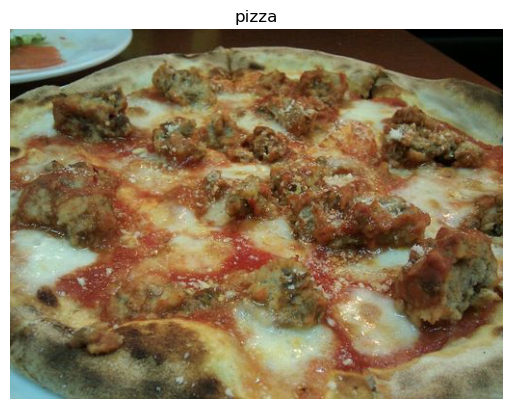

In [8]:
view_random_image("pizza")

Image shape: (512, 512, 3)


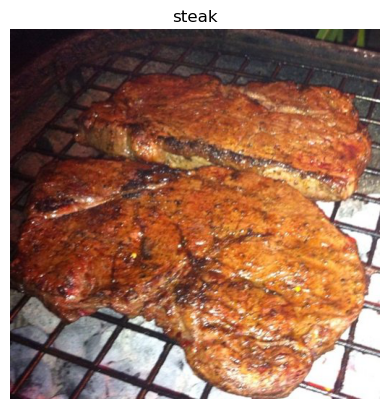

In [9]:
view_random_image("steak")

#### Pre-processing

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


#### Tiny VGG


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping
# tiny VGG 
def tiny_vgg():
    FILTERS = 10
    model = Sequential([
    Conv2D(filters=FILTERS,kernel_size =(3,3),activation="relu",input_shape=(224,224,3),name='conv_1_1'),
    Conv2D(filters=FILTERS,kernel_size =(3,3),activation="relu",name='conv_1_2'),
    MaxPool2D((2, 2), name='max_pool_1',padding="valid"),

    Conv2D(filters=FILTERS,kernel_size =(3,3),activation="relu",name='conv_2_1'),
    Conv2D(filters=FILTERS,kernel_size =(3,3),activation="relu",name='conv_2_2'),
    MaxPool2D((2, 2), name='max_pool_2'),

    Flatten(name='flatten'),
    Dense(1, activation='sigmoid', name='output')
    ])
    return model;


In [13]:
# crete the model 
model_one = tiny_vgg()
# Compile the model
model_one.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
history_one = model_one.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2023-12-11 18:22:11.851418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-12-11 18:22:11.884578: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - ETA: 0s - loss: 0.6373 - accuracy: 0.6500

2023-12-11 18:22:26.013777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 16s 336ms/step - loss: 0.6373 - accuracy: 0.6500 - val_loss: 0.5368 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 16s 332ms/step - loss: 0.4692 - accuracy: 0.7833 - val_loss: 0.3525 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 16s 332ms/step - loss: 0.3910 - accuracy: 0.8293 - val_loss: 0.3224 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 16s 336ms/step - loss: 0.3715 - accuracy: 0.8427 - val_loss: 0.3408 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 16s 338ms/step - loss: 0.3104 - accuracy: 0.8720 - val_loss: 0.3097 - val_accuracy: 0.8540


In [14]:
import pandas as pd
pd.DataFrame(history_one.history)

,loss,accuracy,val_loss,val_accuracy
0,0.637349,0.650000,0.536757,0.758
1,0.469216,0.783333,0.352478,0.854
2,0.391033,0.829333,0.322367,0.868
3,0.371459,0.842667,0.340812,0.854
4,0.310428,0.872000,0.309732,0.854


<Axes: >

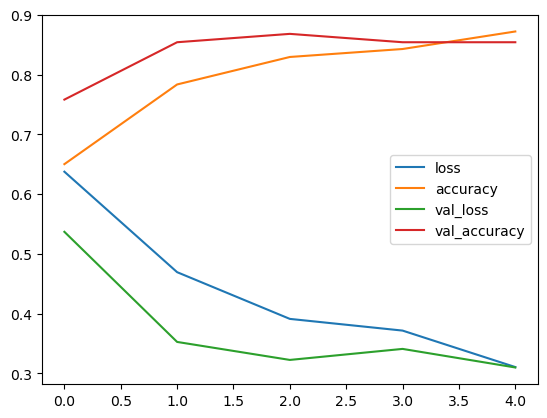

In [15]:
pd.DataFrame(history_one.history).plot()

In [16]:
# Check out the layers in our model
model_one.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1_1 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv_1_2 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 110, 110, 10)      0         
                                                                 
 conv_2_1 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv_2_2 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pool_2 (MaxPooling2D)   (None, 53, 53, 10)        0         
                                                                 
 flatten (Flatten)           (None, 28090)             0

##### Early stopping

In [17]:
 # crete the model 
model_two = tiny_vgg()
# Compile the model
model_two.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callback = EarlyStopping(monitor='val_loss', patience=1)
# Fit the model
history_two = model_two.fit(train_data,
                        epochs=5,
                        callbacks=[callback],
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2023-12-11 18:23:31.249839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6235 - accuracy: 0.6420

2023-12-11 18:23:45.556613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 16s 346ms/step - loss: 0.6235 - accuracy: 0.6420 - val_loss: 0.4149 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 16s 347ms/step - loss: 0.4510 - accuracy: 0.7987 - val_loss: 0.4235 - val_accuracy: 0.8000


In [18]:
pd.DataFrame(history_two.history)

,loss,accuracy,val_loss,val_accuracy
0,0.623482,0.642000,0.414885,0.812
1,0.450979,0.798667,0.423521,0.800


<Axes: >

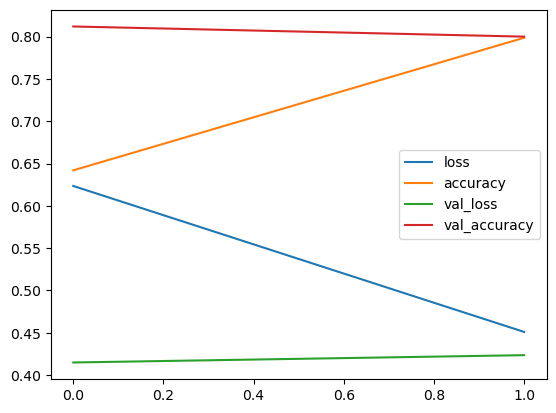

In [19]:
pd.DataFrame(history_two.history).plot()

#### VGG16

In [20]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [21]:
def vgg_16():
    input = Input(shape=(224,224,3))

    x = Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(input)
    x = Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")(x)

    x = Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")(x)

    x = Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")(x)

    x = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")(x)
    
    x = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu")(x)
    x = MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")(x)

    x = Flatten()(x)
    x = Dense(units = 4096,activation="relu")(x)
    x = Dense(units = 4096,activation="relu")(x)
    
    output = Dense(units =1, activation='sigmoid' )(x)
    model = Model(inputs=input, outputs=output)
    return model

In [22]:
# model_three = vgg_16()
# model_three.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
# history_three = model_three.fit(train_data,
#                         epochs=5,
#                         callbacks=[callback],
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

#### Baseline model

In [23]:
model_four = Sequential([
    Conv2D(filters=10,kernel_size = (3,3),padding="valid",activation="relu"),
    Conv2D(filters=10,kernel_size = (3,3),padding="valid",activation="relu"),
    Conv2D(filters=10,kernel_size = (3,3),padding="valid",activation="relu"),
    Flatten(),
    Dense(units = 1,activation="sigmoid")
])
model_four.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history_four = model_four.fit(train_data,epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data = valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5


2023-12-11 18:24:04.443269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 1.0150 - accuracy: 0.6380

2023-12-11 18:29:05.660171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 304s 7s/step - loss: 1.0150 - accuracy: 0.6380 - val_loss: 0.5562 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 20s 416ms/step - loss: 0.4719 - accuracy: 0.7753 - val_loss: 0.4241 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 19s 405ms/step - loss: 0.3307 - accuracy: 0.8633 - val_loss: 0.3986 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 19s 406ms/step - loss: 0.1758 - accuracy: 0.9467 - val_loss: 0.4445 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 19s 405ms/step - loss: 0.0600 - accuracy: 0.9840 - val_loss: 0.5316 - val_accuracy: 0.7920


In [24]:
# plot loss curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

# history dataframe
def history_df(history):
    return pd.DataFrame(history.history)

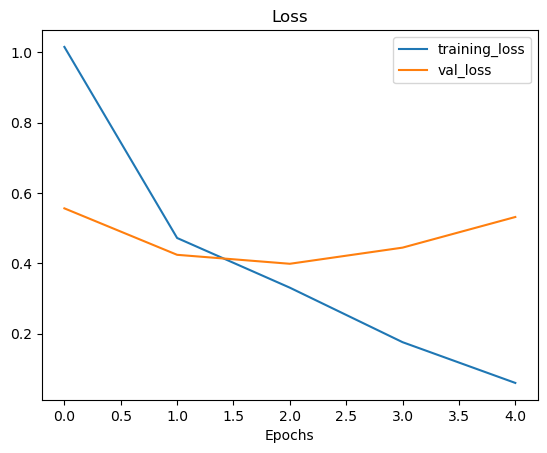

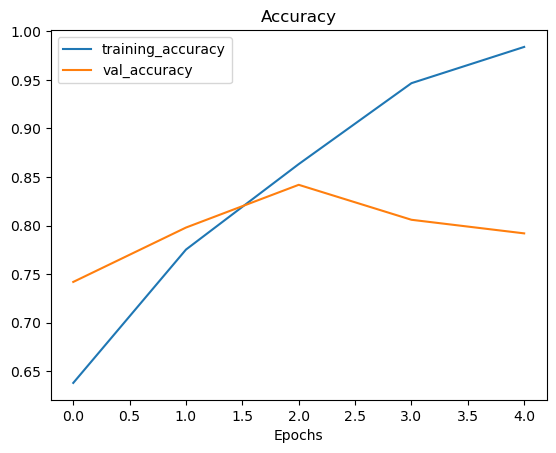

In [25]:
plot_loss_curves(history_four)

In [26]:
history_df(history_four)

,loss,accuracy,val_loss,val_accuracy
0,1.015041,0.638000,0.556167,0.742
1,0.471919,0.775333,0.424106,0.798
2,0.330667,0.863333,0.398636,0.842
3,0.175761,0.946667,0.444530,0.806
4,0.059954,0.984000,0.531587,0.792


In [27]:
# improving our baseline model
model_five = Sequential([
    Conv2D(filters=16,kernel_size = (3,3),padding="valid",activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=16,kernel_size = (3,3),padding="valid",activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=16,kernel_size = (3,3),padding="valid",activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(units = 1,activation="sigmoid")
])
model_five.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history_five = model_five.fit(train_data,epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data = valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5


2023-12-11 18:30:25.482565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.5953 - accuracy: 0.6780

2023-12-11 18:30:32.549840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 8s 170ms/step - loss: 0.5953 - accuracy: 0.6780 - val_loss: 0.5800 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.4587 - accuracy: 0.7873 - val_loss: 0.4353 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.4121 - accuracy: 0.8107 - val_loss: 0.3243 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.3793 - accuracy: 0.8287 - val_loss: 0.3331 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.3512 - accuracy: 0.8553 - val_loss: 0.3336 - val_accuracy: 0.8620


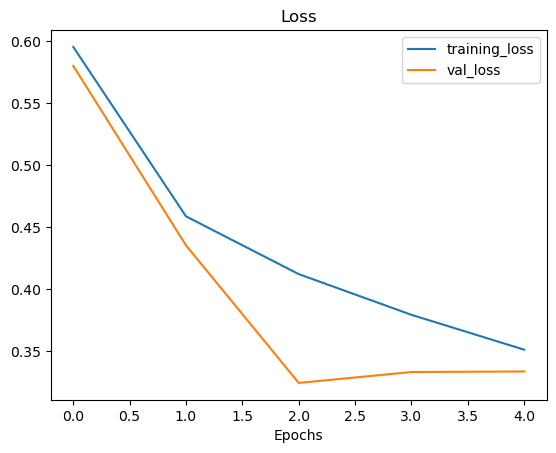

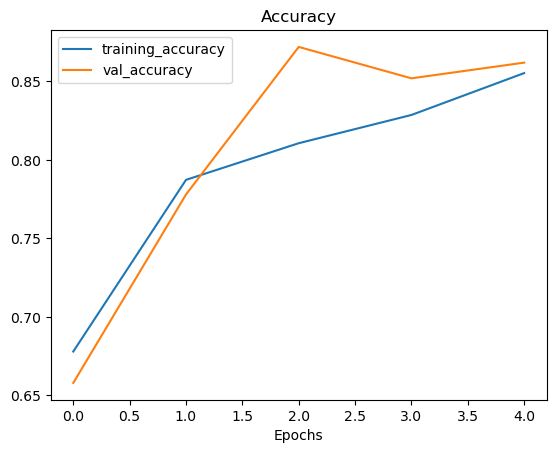

In [28]:
plot_loss_curves(history_five)

In [29]:
history_df(history_five)

,loss,accuracy,val_loss,val_accuracy
0,0.595286,0.678000,0.580001,0.658
1,0.458676,0.787333,0.435254,0.778
2,0.412080,0.810667,0.324349,0.872
3,0.379268,0.828667,0.333133,0.852
4,0.351157,0.855333,0.333582,0.862


In [102]:
class ImprovedBaseline:
    def __init__(self,train_data,test_data,epochs=5):
        self.train_data = train_data
        self.test_data = test_data
        self.epochs = epochs
        self.model = self.build_model()
        self.compile_model()
        self.history = self.train_model()

    def build_model(self):
        model = Sequential([
            Conv2D(filters=16, kernel_size=(3, 3), padding="valid", activation="relu"),
            MaxPool2D(pool_size=(2, 2)),
            Conv2D(filters=16, kernel_size=(3, 3), padding="valid", activation="relu"),
            MaxPool2D(pool_size=(2, 2)),
            Conv2D(filters=16, kernel_size=(3, 3), padding="valid", activation="relu"),
            MaxPool2D(pool_size=(2, 2)),
            Flatten(),
            Dense(units=1, activation="sigmoid")
        ])
        return model

    def compile_model(self):
        self.model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    def train_model(self):
        history = self.model.fit(self.train_data, epochs=self.epochs,
                                 steps_per_epoch=len(self.train_data),
                                 validation_data=self.test_data,
                                 validation_steps=len(self.test_data))
        return history
        
    def plot_loss_curves(self):
      """
      Returns separate loss curves for training and validation metrics.
      """ 
      loss = self.history.history['loss']
      val_loss = self.history.history['val_loss']
    
      accuracy = self.history.history['accuracy']
      val_accuracy = self.history.history['val_accuracy']
    
      epochs = range(len(self.history.history['loss']))
    
      # Plot loss
      plt.plot(epochs, loss, label='training_loss')
      plt.plot(epochs, val_loss, label='val_loss')
      plt.title('Loss')
      plt.xlabel('Epochs')
      plt.legend()
    
      # Plot accuracy
      plt.figure()
      plt.plot(epochs, accuracy, label='training_accuracy')
      plt.plot(epochs, val_accuracy, label='val_accuracy')
      plt.title('Accuracy')
      plt.xlabel('Epochs')
      plt.legend();  
    def history_df(self):
        return pd.DataFrame(self.history.history)
    def predict(self,x):
        return self.model.predict(x)

In [31]:
model_six = ImprovedBaseline(train_data,valid_data)


Epoch 1/5


2023-12-11 18:31:06.385725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6060 - accuracy: 0.6740

2023-12-11 18:31:13.594057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 8s 174ms/step - loss: 0.6060 - accuracy: 0.6740 - val_loss: 0.4627 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.4605 - accuracy: 0.7873 - val_loss: 0.3606 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.3995 - accuracy: 0.8200 - val_loss: 0.3279 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.3806 - accuracy: 0.8313 - val_loss: 0.4008 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3597 - accuracy: 0.8433 - val_loss: 0.3047 - val_accuracy: 0.8740


In [32]:
model_six.history_df()

,loss,accuracy,val_loss,val_accuracy
0,0.605969,0.674000,0.462686,0.770
1,0.460459,0.787333,0.360605,0.852
2,0.399493,0.820000,0.327910,0.876
3,0.380582,0.831333,0.400833,0.808
4,0.359659,0.843333,0.304742,0.874


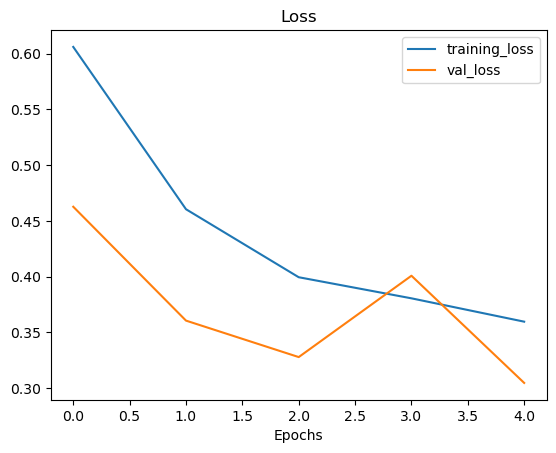

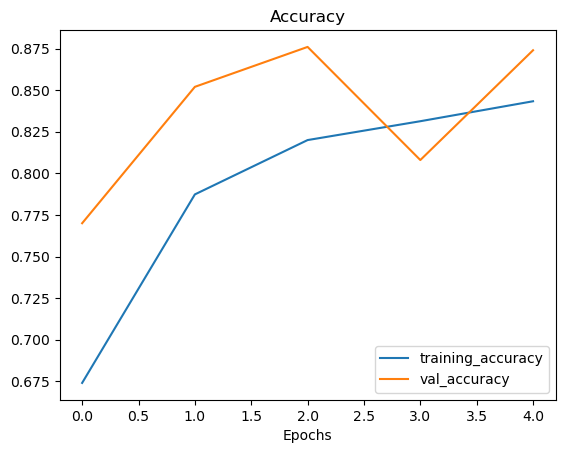

In [33]:
model_six.plot_loss_curves()

#### Data Augmentation

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_datagen_aug = ImageDataGenerator(
    rescale=1/255.,
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    featurewise_center=True,
    featurewise_std_normalization=True,
)
test_datagen = ImageDataGenerator(
    rescale=1/255.
)
train_datagen = ImageDataGenerator(
    rescale=1/255.
)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        shuffle=False) 

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [36]:
augmented_images,_ = train_data_aug.next()
images,labels =train_data.next()

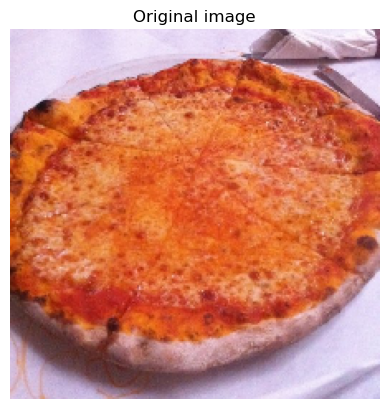

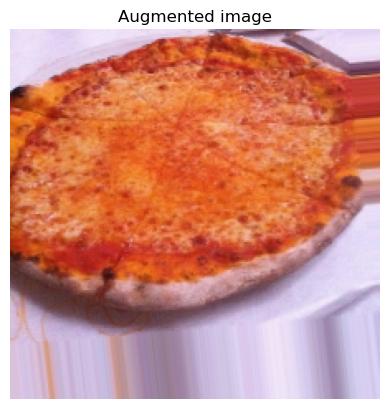

In [37]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Fitting the same model in the augmented data

In [38]:
model_seven = ImprovedBaseline(train_data = train_data_aug,test_data = test_data)


Epoch 1/5


2023-12-11 18:31:48.790319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.8560 - accuracy: 0.4620

2023-12-11 18:32:02.910229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 20s 424ms/step - loss: 0.8560 - accuracy: 0.4620 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 251ms/step - loss: 0.6937 - accuracy: 0.4933 - val_loss: 0.6903 - val_accuracy: 0.6320
Epoch 3/5
47/47 [==============================] - 12s 257ms/step - loss: 0.6978 - accuracy: 0.5413 - val_loss: 0.6828 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 253ms/step - loss: 0.6820 - accuracy: 0.5700 - val_loss: 0.7337 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 255ms/step - loss: 0.7071 - accuracy: 0.4307 - val_loss: 0.6855 - val_accuracy: 0.5820


In [39]:
model_seven.history_df()

,loss,accuracy,val_loss,val_accuracy
0,0.856036,0.462000,0.690802,0.500
1,0.693721,0.493333,0.690297,0.632
2,0.697833,0.541333,0.682841,0.500
3,0.681959,0.570000,0.733670,0.500
4,0.707052,0.430667,0.685481,0.582


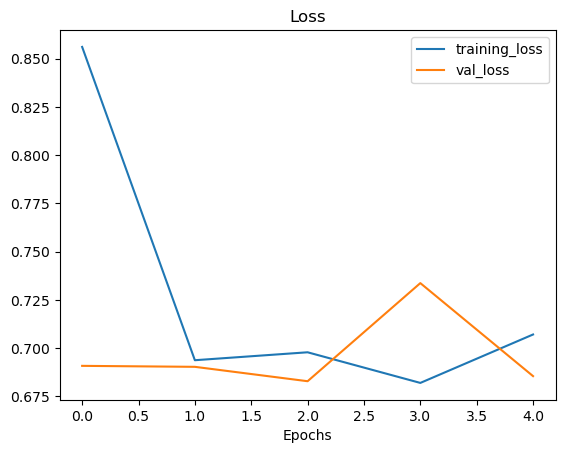

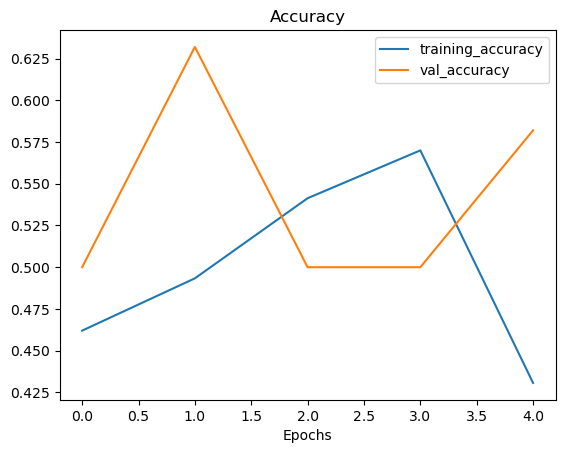

In [40]:
model_seven.plot_loss_curves()


In [41]:
train_data_aug_shuffle = train_datagen_aug.flow_from_directory(train_dir,target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        shuffle=True) 

Found 1500 images belonging to 2 classes.


In [42]:
model_eight = ImprovedBaseline(train_data = train_data_aug_shuffle,test_data = test_data)

Epoch 1/5


2023-12-11 18:32:57.559606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.5667

2023-12-11 18:33:08.699126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 12s 256ms/step - loss: 0.6697 - accuracy: 0.5667 - val_loss: 0.5928 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 14s 304ms/step - loss: 0.5603 - accuracy: 0.7047 - val_loss: 0.5428 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 13s 285ms/step - loss: 0.5163 - accuracy: 0.7500 - val_loss: 0.4070 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 12s 261ms/step - loss: 0.4872 - accuracy: 0.7800 - val_loss: 0.3600 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 13s 272ms/step - loss: 0.4795 - accuracy: 0.7820 - val_loss: 0.3573 - val_accuracy: 0.8560


In [43]:
model_eight.history_df()

,loss,accuracy,val_loss,val_accuracy
0,0.669704,0.566667,0.592800,0.702
1,0.560321,0.704667,0.542825,0.734
2,0.516261,0.750000,0.406962,0.818
3,0.487164,0.780000,0.360000,0.846
4,0.479466,0.782000,0.357310,0.856


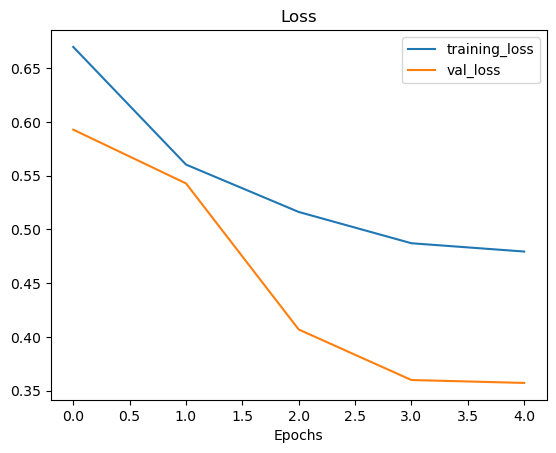

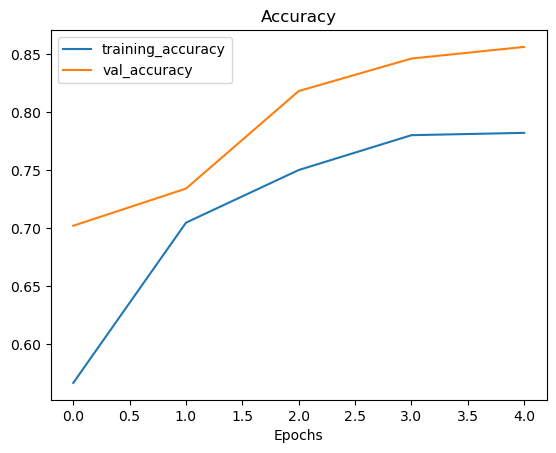

In [44]:
model_eight.plot_loss_curves()

In [47]:
#training for longer  
model_nine = ImprovedBaseline(train_data = train_data_aug_shuffle,test_data = test_data,epochs=8)

Epoch 1/8


2023-12-11 18:36:07.657296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6780 - accuracy: 0.5640

2023-12-11 18:36:18.489458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 12s 248ms/step - loss: 0.6780 - accuracy: 0.5640 - val_loss: 0.5582 - val_accuracy: 0.7460
Epoch 2/8
47/47 [==============================] - 12s 246ms/step - loss: 0.5566 - accuracy: 0.7087 - val_loss: 0.4030 - val_accuracy: 0.8260
Epoch 3/8
47/47 [==============================] - 12s 248ms/step - loss: 0.4907 - accuracy: 0.7820 - val_loss: 0.3923 - val_accuracy: 0.8380
Epoch 4/8
47/47 [==============================] - 12s 244ms/step - loss: 0.5044 - accuracy: 0.7607 - val_loss: 0.3902 - val_accuracy: 0.8360
Epoch 5/8
47/47 [==============================] - 12s 246ms/step - loss: 0.5035 - accuracy: 0.7633 - val_loss: 0.4540 - val_accuracy: 0.7760
Epoch 6/8
47/47 [==============================] - 12s 246ms/step - loss: 0.4698 - accuracy: 0.7733 - val_loss: 0.4285 - val_accuracy: 0.7980
Epoch 7/8
47/47 [==============================] - 12s 250ms/step - loss: 0.4843 - accuracy: 0.7727 - val_loss: 0.3957 - val_accuracy: 0.8140
Epoch 8/8
47/47 

In [48]:
model_nine.history_df()

,loss,accuracy,val_loss,val_accuracy
0,0.677959,0.564000,0.558239,0.746
1,0.556630,0.708667,0.402967,0.826
2,0.490696,0.782000,0.392276,0.838
3,0.504405,0.760667,0.390196,0.836
4,0.503456,0.763333,0.454013,0.776
5,0.469792,0.773333,0.428487,0.798
6,0.484315,0.772667,0.395672,0.814
7,0.438539,0.806000,0.310721,0.862


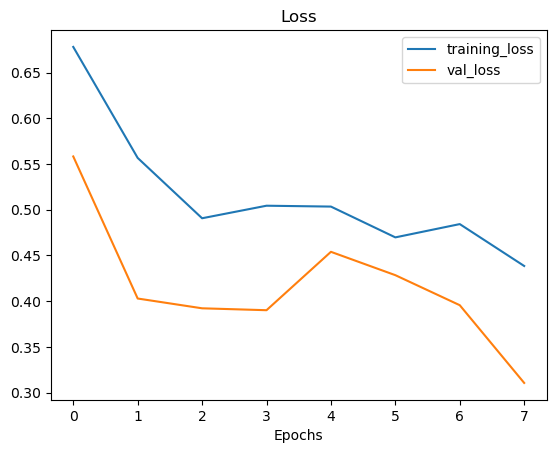

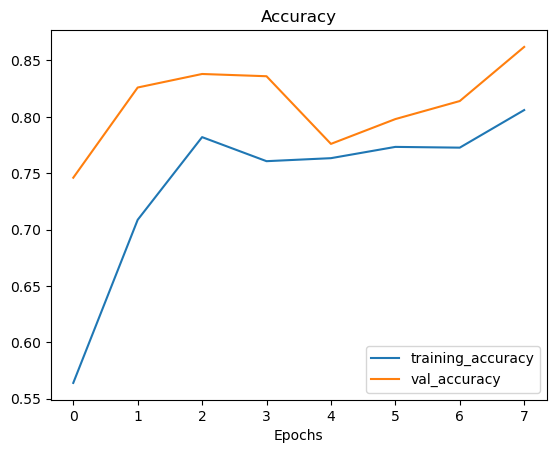

In [49]:
model_nine.plot_loss_curves()

### Making predictions on images

In [56]:
import requests
import io
from PIL import Image

In [67]:
def display_random_image(url):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    print(img)
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3024x4032 at 0x14F6F31D0>


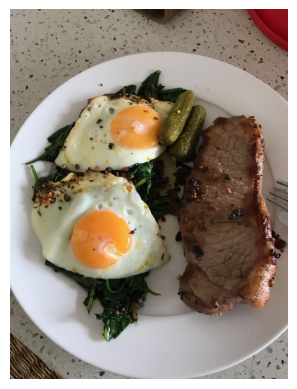

In [133]:
display_random_image('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg')


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x675 at 0x14FBF7650>


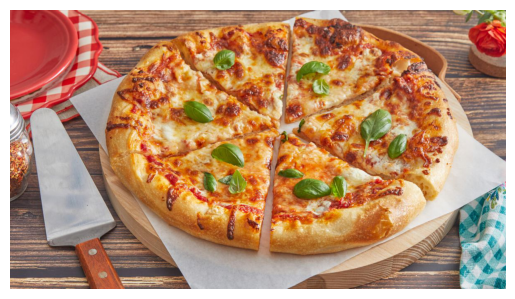

In [132]:
display_random_image('https://hips.hearstapps.com/hmg-prod/images/classic-cheese-pizza-recipe-2-64429a0cb408b.jpg?crop=0.8888888888888888xw:1xh;center,top&resize=1200:*')


In [98]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
def load_and_preprocess_image(url, target_size=(224, 224)):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    img = img.resize(target_size)
    img = img_to_array(img)/255.
    return img

In [99]:
steak = load_and_preprocess_image('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg')

In [104]:
print(steak.shape)

(224, 224, 3)


In [107]:
# adding extra dimensions to fit our model
steak = tf.expand_dims(steak, axis=0)

In [131]:
pred = model_five.predict(steak)
pred_class = class_names[int(tf.round(pred))]
pred_class

1/1 [==============================] - 0s 19ms/step


'steak'

In [136]:
def plot_predict(url):
    img = load_and_preprocess_image(url)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    
    plt.title(f"Predicted :{pred_class} {pred}")
    plt.show()
    

1/1 [==============================] - 0s 11ms/step


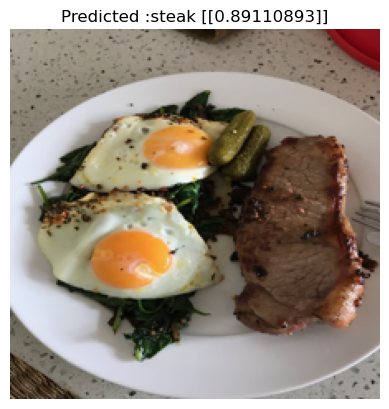

In [137]:
plot_predict('https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg')